# Autocorrelation

Previously, we discussed the assumptions of linear regression, a key assumption being that the residuals have no autocorrelation, i.e. the residuals are *independent*. The autocorrelation in the residuals stems from autocorrelation in one or more of our time series. Sometimes, however, we still want to examine these time series even though the condition of independent residuals is violated and methods to account for the autocorrelation have been developed.

**Autocorrelation** describes the dependence of or relationship between data within a time series on data within that same time series at a different point in time. Autocorrelation means that the data points within our time series are not independent.

In the next section, we will explore how to account for autocorrelation in our residuals, but first we will define what we mean by autocorrelation. We will start with the **autocovariance function (ACF)**.

The autocovariance function ($\gamma(t)$) is the covariance of a time series with itself at another time, as measured by a time lag (or lead) $\tau$. For a time series $x(t)$, it is defined as:

$$
\gamma(\tau) = \frac{1}{(t_N - \tau) - t_1}\sum_{t=t_1}^{t_N - \tau}x^{\prime}(t) \cdot x^{\prime}(t + \tau)
$$

where $t_1$ and $t_N$ are the starting and end points of the time series, respectively, and the prime denotes departures from the time mean.

For $\tau$ = 0, the autocovariance is $\gamma$(0) = $\overline{x^{\prime2}}$ = variance.

**Autocorrelation** ($\rho$($\tau$)) is simply $\frac{\gamma(\tau)}{\gamma(0)}$ , i.e. the autocovariance divided by the variance.

### *Key Characteristics of Autocovariance/Autocorrelation:*

- $\gamma$ is symmetric about $\tau$ = 0
- -1 $\leq \rho \leq$ 1
- $\rho$(0) = 1
- if $x(t)$ is not periodic, then $\rho$($\tau$) -> 0 as $\tau$ -> $\infty$

Let's create some synthetic time series to investigate the ACF of different types of time series.

First, let's generate some random normal data. We should get an autocorrelation function that looks similar to what we saw for the residuals of our ENSO-California precipitation regression model.

In [1]:
# generate time series of independent random normal data (N = 10000)
import numpy as np
x = np.random.randn(10000)

The time series looks like this:

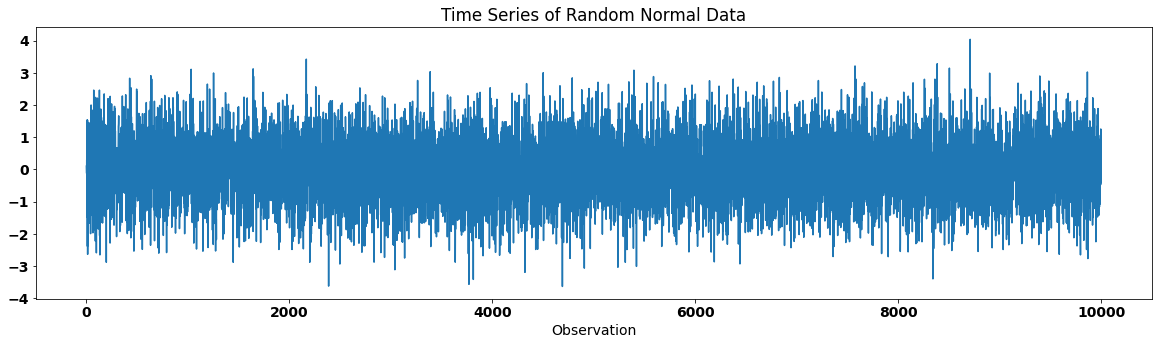

In [2]:
# plot the time series of random data
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=14,weight='bold') #set default font size and weight for plots

plt.figure(figsize=(20,5))
plt.plot(x)
plt.xlabel("Observation")
plt.title("Time Series of Random Normal Data")
plt.show()

We can calculate the autocorrelation function using the `np.correlate()` function. Note that this function computes the autocovariance (except it does not divide by $N$), not the autocorrelation, so we have to make some adjustments to convert to autocorrelation. In this case, we simply divide by $N$, because we are using random data drawn from a standard normal distribution, i.e. $\sigma$ = 1. 

In [3]:
# calculate the autocorrelation of x
acorr = np.correlate(x,x/len(x),'same')

To visualize the autocorrelation function, we plot it as a function of lag, $\tau$.

Text(0.5, 1.0, 'Autocorrelation of Independent Random Normal Data')

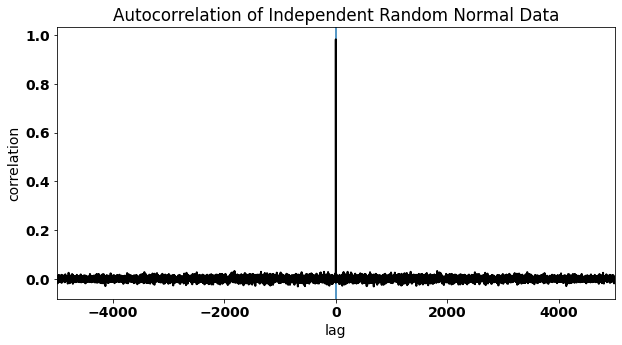

In [4]:
# plot the autocorrelation as a function of lag
fig = plt.figure(figsize=(10,5))

# define a variable for lag
t = np.arange(0,len(x),1)
lag = [i-len(t)/2 for i in t]

# plot acorr
plt.axhline(0)
plt.axvline(0)
plt.plot(lag,acorr,'k',linewidth=2,label='resids')
plt.xlim(-5000,5000)
plt.xlabel("lag")
plt.ylabel("correlation")
plt.title("Autocorrelation of Independent Random Normal Data")

Let's consider something different: the time series of a sine wave. This time series has a fixed periodicity. What do you think the autocorrelation function for a sine wave looks like?

In [5]:
# generate sine wave
x1 = np.linspace(-10*np.pi,10*np.pi,10000)
y1 = np.sin(x1)

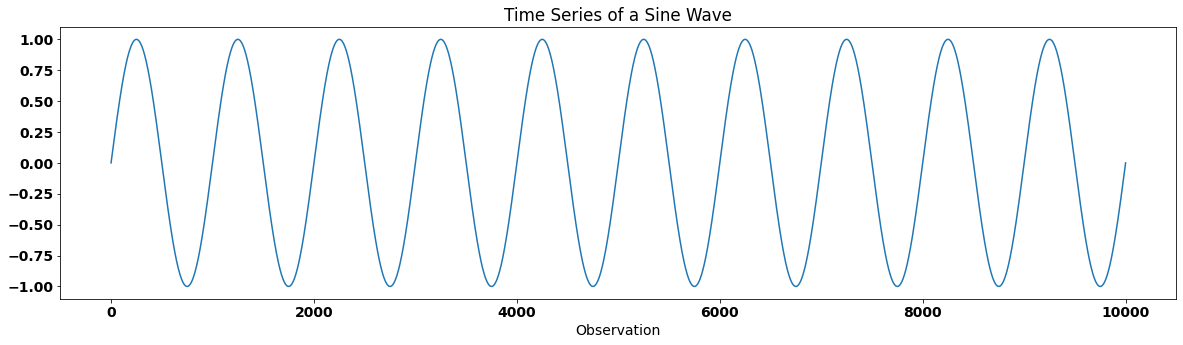

In [6]:
# plot the time series of sine wave
plt.figure(figsize=(20,5))
plt.plot(y1)
plt.xlabel("Observation")
plt.title("Time Series of a Sine Wave")
plt.show()

We will use the same function to calculate the autocorrelation function, but this time we also need to divide by the variance of the sine wave to convert to autocorrelation. 

In [7]:
# calculate the autocorrelation of sine wave, y1
acorr1 = np.correlate(y1/np.std(y1),y1/(np.std(y1)*len(y1)),'same')

Text(0.5, 1.0, 'Autocorrelation of Sine Wave')

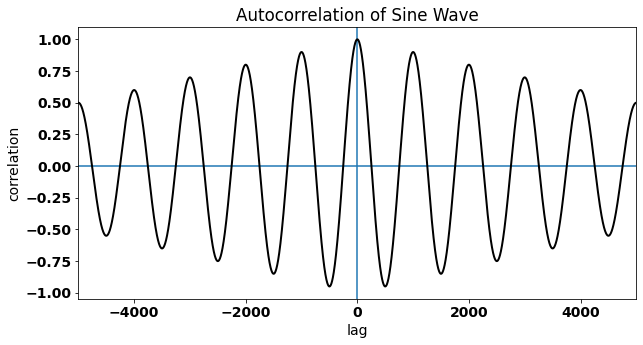

In [8]:
# plot the autocorrelation as a function of lag
fig = plt.figure(figsize=(10,5))

# define a variable for lag
t = np.arange(0,len(y1),1)
lag = [i-len(t)/2 for i in t]

# plot acorr
plt.axhline(0)
plt.axvline(0)
plt.plot(lag,acorr1,'k',linewidth=2,label='resids')
plt.xlim(-5000,5000)
plt.xlabel("lag")
plt.ylabel("correlation")
plt.title("Autocorrelation of Sine Wave")

We can clearly see the periodicity in the autocorrelation function.

Finally, let's take a look at the autocorrelation function of a time series with a linear trend. The linear trend in the data implies dependence between adjacent data points. 

In [9]:
# generate time series of a linear trend
x2 = np.linspace(0,1000,10000)
y2 = 2*x2

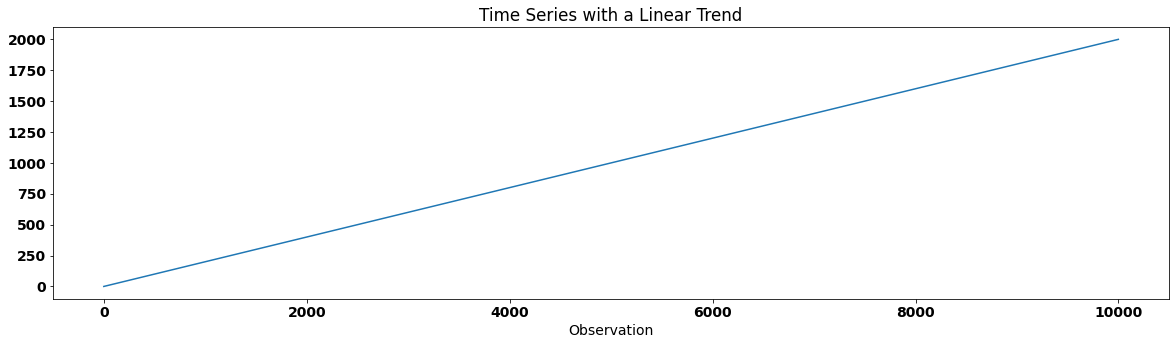

In [10]:
# plot the time series of a linear trend
plt.figure(figsize=(20,5))
plt.plot(y2)
plt.xlabel("Observation")
plt.title("Time Series with a Linear Trend")
plt.show()

This time we need to adjust the input to our `np.correlate()` function even more. The function assumes that the data already has the mean removed. In the previous two examples, the mean was zero, so we did not have to worry about subtracting the mean. In this case the mean is non-zero, so we need to subtract the mean.

In [11]:
# calculate the autocorrelation of y2
acorr2 = np.correlate((y2-np.mean(y2))/np.std(y2),(y2-np.mean(y2))/(np.std(y2)*len(y2)),'same')

Text(0.5, 1.0, 'Autocorrelation of Linear Trend')

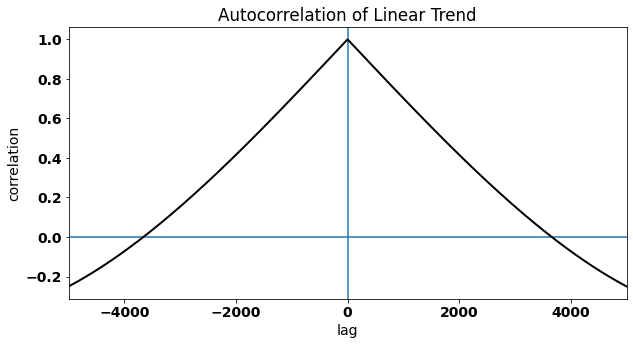

In [12]:
# plot the autocorrelation as a function of lag
fig = plt.figure(figsize=(10,5))

# define a variable for lag
t = np.arange(0,len(y2),1)
lag = [i-len(t)/2 for i in t]

# plot acorr
plt.axhline(0)
plt.axvline(0)
plt.plot(lag,acorr2,'k',linewidth=2,label='resids')
plt.xlim(-5000,5000)
plt.xlabel("lag")
plt.ylabel("correlation")
plt.title("Autocorrelation of Linear Trend")

The trend in the time series is evident in large autocorrelation values at non-zero lags (i.e., data points in the time series are not independent) and the gradual decay of the autocorrelation function as $\tau$ increases. 

Now, that we are familiar with the concept of autocorrelation, we will explore how to account for autocorrelation in time series in the next section.